In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import os

try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
from tensorflow import keras

tf.__version__

/home/jake/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jake/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jake/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jake/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: P

'2.0.0-beta0'

In [2]:
#!pip uninstall 

In [3]:
tf.test.is_gpu_available()

True

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models, optimizers


In [5]:
num_classes = 10
epochs = 20
batch_size=256
img_rows, img_cols = 32, 32

In [22]:
os.environ["CUDA_VISIBLE_DEVICES"]="1";  
from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
tf.compat.v1.Session(config=config)

In [7]:

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
label_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

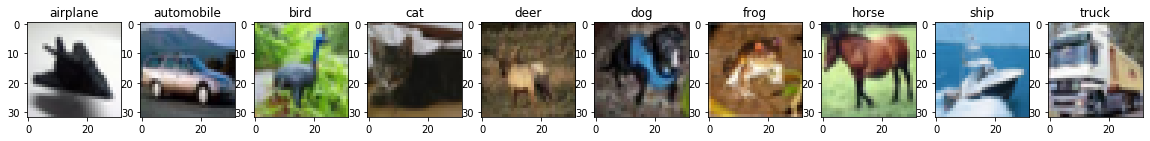

In [9]:
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(1,10,i+1)
    coord = np.where(y_train.flatten() == i)[0][0]
    plt.imshow(x_train[coord])
    plt.title(label_list[y_train[coord][0]])

plt.show()

In [10]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
def model():
    
    inputs = Input(shape=(img_rows,img_rows,3))
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes,activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model

In [15]:
# 모델 객체를 만듭니다
#model = model()
#model.summary()

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

def get_model():
    base_model = VGG16(weights='imagenet', input_shape=(img_rows,img_rows,3), include_top=False)
    #base_model.trainable = False

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    model.summary()

    #optimizer = optimizers.SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
    optimizer = optimizers.RMSprop(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

    return model
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 15,250,250
Trainable params: 15,250,250
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)            

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [18]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 271us/sample - loss: 6.9972 - accuracy: 0.1219 - val_loss: 2.4375 - val_accuracy: 0.1246
Epoch 2/100
50000/50000 [==============================] - 11s 219us/sample - loss: 2.4182 - accuracy: 0.1204 - val_loss: 2.2932 - val_accuracy: 0.1311
Epoch 3/100
50000/50000 [==============================] - 11s 219us/sample - loss: 2.2953 - accuracy: 0.1315 - val_loss: 2.2534 - val_accuracy: 0.1440
Epoch 4/100
50000/50000 [==============================] - 11s 219us/sample - loss: 2.2436 - accuracy: 0.1652 - val_loss: 2.1827 - val_accuracy: 0.1884
Epoch 5/100
50000/50000 [==============================] - 11s 220us/sample - loss: 2.1820 - accuracy: 0.2025 - val_loss: 2.0823 - val_accuracy: 0.2430
Epoch 6/100
50000/50000 [==============================] - 11s 221us/sample - loss: 2.1025 - acc

50000/50000 [==============================] - 11s 224us/sample - loss: 0.6168 - accuracy: 0.7997 - val_loss: 0.6835 - val_accuracy: 0.7813
Epoch 53/100
50000/50000 [==============================] - 11s 224us/sample - loss: 0.6128 - accuracy: 0.8012 - val_loss: 0.6770 - val_accuracy: 0.7810
Epoch 54/100
50000/50000 [==============================] - 11s 223us/sample - loss: 0.6037 - accuracy: 0.8032 - val_loss: 0.6753 - val_accuracy: 0.7813
Epoch 55/100
50000/50000 [==============================] - 11s 225us/sample - loss: 0.5962 - accuracy: 0.8067 - val_loss: 0.6714 - val_accuracy: 0.7830
Epoch 56/100
50000/50000 [==============================] - 11s 222us/sample - loss: 0.5924 - accuracy: 0.8076 - val_loss: 0.6712 - val_accuracy: 0.7807
Epoch 57/100
50000/50000 [==============================] - 11s 223us/sample - loss: 0.5785 - accuracy: 0.8114 - val_loss: 0.6704 - val_accuracy: 0.7845
Epoch 58/100
50000/50000 [==============================] - 11s 223us/sample - loss: 0.5734 - a

In [23]:
model.save('../models/cifar10_gradcam.h5')

# reference

In [87]:
'''
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
'''

"\nfrom __future__ import print_function\nimport keras\nfrom keras.datasets import mnist\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Dropout, Flatten\nfrom keras.layers import Conv2D, MaxPooling2D\nfrom keras import backend as K\n\nbatch_size = 128\nnum_classes = 10\nepochs = 12\n\n# input image dimensions\nimg_rows, img_cols = 28, 28\n\n# the data, split between train and test sets\n(x_train, y_train), (x_test, y_test) = mnist.load_data()\nprint(x_train.shape)\nif K.image_data_format() == 'channels_first':\n    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)\n    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)\n    input_shape = (1, img_rows, img_cols)\nelse:\n    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)\n    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)\n    input_shape = (img_rows, img_cols, 1)\n\nx_train = x_train.astype('float32')\nx_test = x_test.astype('float32')\nx_train /= 